# _NYC Airbnb Price Prediction_

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline,FeatureUnion

from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [3]:
airbnb.shape

(48895, 16)

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

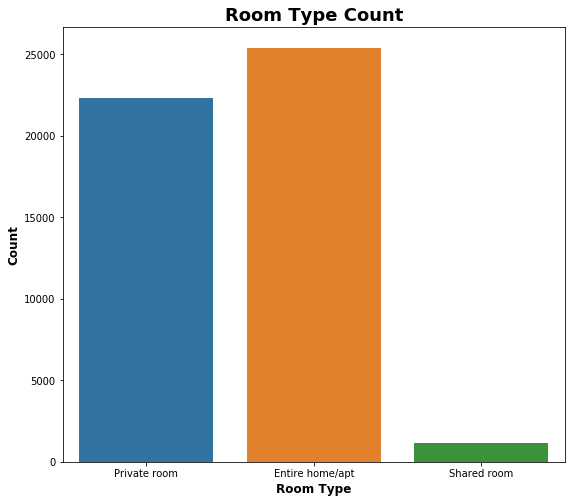

In [6]:
plt.figure(figsize=(9,8))
sns.countplot(x='room_type', data=airbnb)
plt.ylabel('Count', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.xlabel('Room Type', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.title('Room Type Count', fontdict={'fontweight':'bold', 'fontsize':'18'})
plt.show()

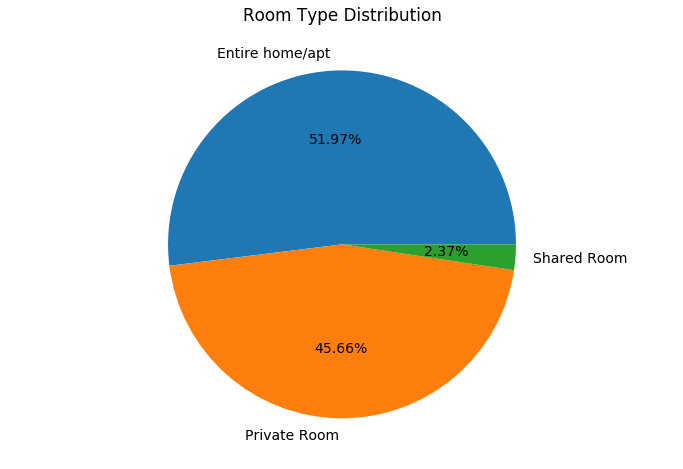

In [7]:
plt.figure(figsize=(12,8))
plt.axis('equal')
plt.rcParams.update({'font.size': 14})
plt.pie(x=airbnb.room_type.value_counts(), autopct='%.02f%%', 
        labels=['Entire home/apt','Private Room','Shared Room'])
plt.title('Room Type Distribution')
plt.show()

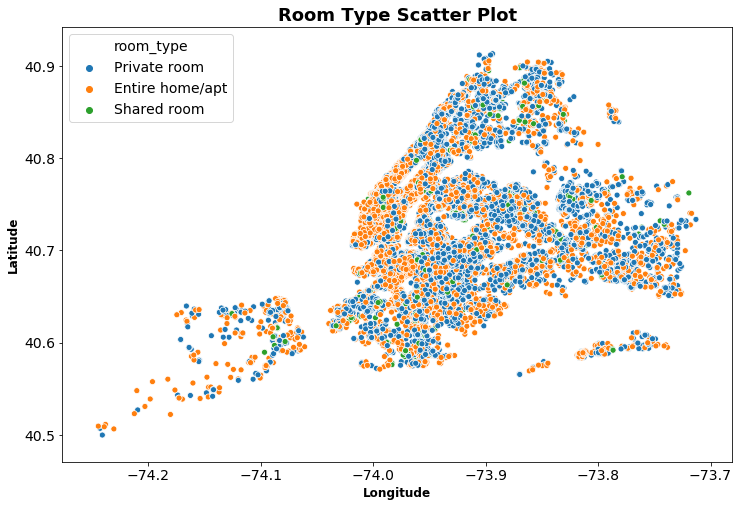

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude', y='latitude', data=airbnb, hue='room_type')
plt.ylabel('Latitude', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.xlabel('Longitude', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.title('Room Type Scatter Plot', fontdict={'fontweight':'bold', 'fontsize':'18'})
plt.legend()
plt.show()

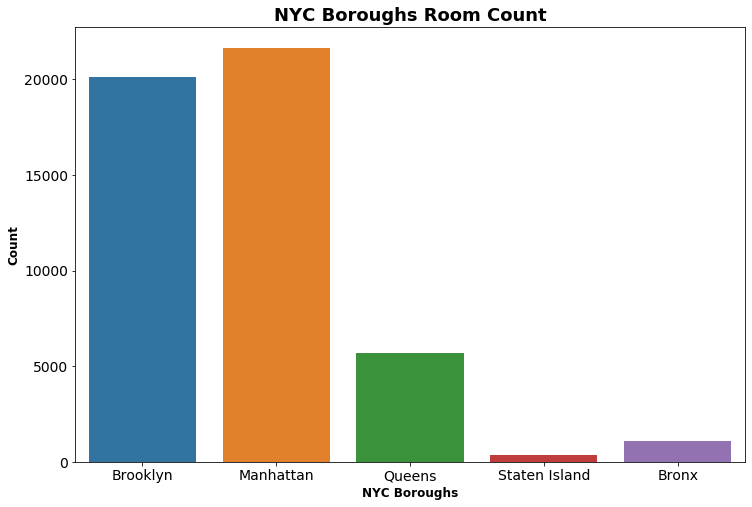

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x='neighbourhood_group', data=airbnb)
plt.ylabel('Count', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.xlabel('NYC Boroughs', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.title('NYC Boroughs Room Count', fontdict={'fontweight':'bold', 'fontsize':'18'})
plt.show()

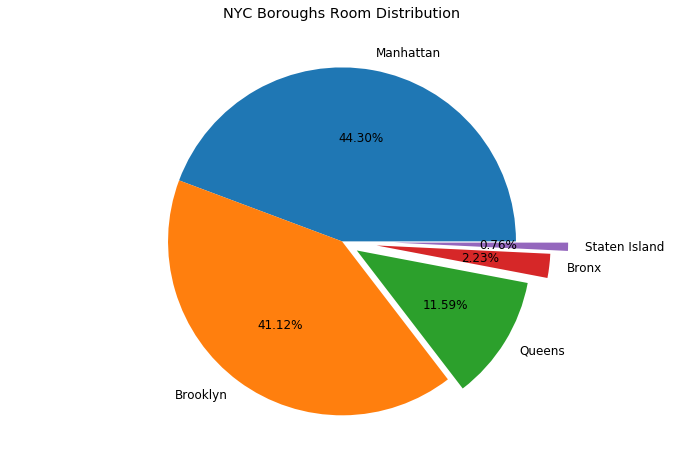

In [10]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 12})
plt.axis('equal')
plt.pie(x=airbnb.neighbourhood_group.value_counts(), autopct='%.02f%%', 
        labels=['Manhattan','Brooklyn','Queens','Bronx','Staten Island'], 
        explode=(0,0,0.1,0.2,0.3))
plt.title('NYC Boroughs Room Distribution')
plt.show()

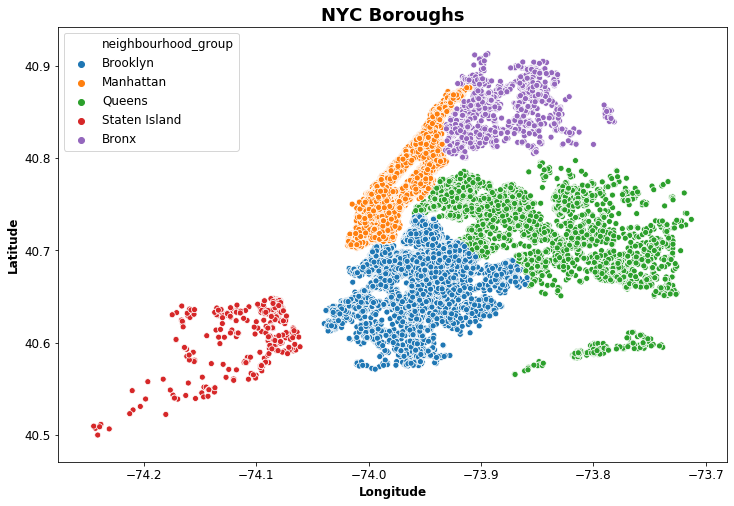

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude', y='latitude', data=airbnb, hue='neighbourhood_group')
plt.ylabel('Latitude', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.xlabel('Longitude', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.title('NYC Boroughs', fontdict={'fontweight':'bold', 'fontsize':'18'})
plt.show()

### Data Cleaning

In [12]:
airbnb.drop(['id','host_id','name','host_name','last_review','reviews_per_month','latitude','longitude', 'neighbourhood'], axis=1, inplace=True)
airbnb.isnull().sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.0,5.0,24.0,629.0
calculated_host_listings_count,48895.0,7.143982,32.952519,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,112.781327,131.622289,0.0,0.0,45.0,227.0,365.0


### Using Onehot Encoder on Categorical Variables

In [14]:
airbnb = pd.get_dummies(airbnb, drop_first=True)

In [15]:
airbnb.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,149,1,9,6,365,1,0,0,0,1,0
1,225,1,45,2,355,0,1,0,0,0,0
2,150,3,0,1,365,0,1,0,0,1,0
3,89,1,270,1,194,1,0,0,0,0,0
4,80,10,9,1,0,0,1,0,0,0,0


In [16]:
airbnb.dtypes

price                                int64
minimum_nights                       int64
number_of_reviews                    int64
calculated_host_listings_count       int64
availability_365                     int64
neighbourhood_group_Brooklyn         uint8
neighbourhood_group_Manhattan        uint8
neighbourhood_group_Queens           uint8
neighbourhood_group_Staten Island    uint8
room_type_Private room               uint8
room_type_Shared room                uint8
dtype: object

### Coverting the uint8  into obejct data type

In [17]:
for i in range(airbnb.shape[1]):
    if airbnb.dtypes[i]=='uint8':
        airbnb.iloc[:,i] = airbnb.iloc[:,i].astype('object')

airbnb.dtypes

price                                 int64
minimum_nights                        int64
number_of_reviews                     int64
calculated_host_listings_count        int64
availability_365                      int64
neighbourhood_group_Brooklyn         object
neighbourhood_group_Manhattan        object
neighbourhood_group_Queens           object
neighbourhood_group_Staten Island    object
room_type_Private room               object
room_type_Shared room                object
dtype: object

In [18]:
X = airbnb.drop('price', axis=1)
y = np.sqrt(airbnb.price)

### Function to distinguish integer and object data types

In [19]:
def object_dtype(dataframe):
    return dataframe.select_dtypes(include=['object'])

def integer_dtype(dataframe):
    return dataframe.select_dtypes(include=['int'])

### Function to create a dataframe of metrics 

In [20]:
def matrix(name, MAE, RMSE, R2_score):
    return pd.DataFrame({'Algorithm':[name], 
                         'MAE':[round(MAE,3)], 
                         'RMSE':[round(RMSE,3)], 
                         'R2 Score':[round(R2_score,3)]})

## Machine Learning Algorithms

### Linear Regession

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
score = cross_validate(lm, X, y, cv=20, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'])
mae = np.abs(score['test_neg_mean_absolute_error'].mean())
rmse = np.abs(score['test_neg_root_mean_squared_error'].mean())
r2 = np.abs(score['test_r2'].mean())
print('Mean Absolute Error:     ', mae)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2)
df = matrix(name='Linear Regression', MAE=mae, RMSE=rmse, R2_score=r2)

Mean Absolute Error:      2.3358086192074023
Root Mean Squared Error:  4.001833760664544
R2 Score:                 0.3099305242135947


### Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=200)
score = cross_validate(gb, X, y, cv=20, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'])
mae = np.abs(score['test_neg_mean_absolute_error'].mean())
rmse = np.abs(score['test_neg_root_mean_squared_error'].mean())
r2 = np.abs(score['test_r2'].mean())
print('Mean Absolute Error:     ', mae)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2)
df = df.append(matrix(name='Gradient Boosting', MAE=mae, RMSE=rmse, R2_score=r2), ignore_index=True)

Mean Absolute Error:      2.226764360832301
Root Mean Squared Error:  3.843837837020897
R2 Score:                 0.3636526266885798


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
score = cross_validate(rf, X, y, cv=20, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'])
mae = np.abs(score['test_neg_mean_absolute_error'].mean())
rmse = np.abs(score['test_neg_root_mean_squared_error'].mean())
r2 = np.abs(score['test_r2'].mean())
print('Mean Absolute Error:     ', mae)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2)
df = df.append(matrix(name='Random Forest', MAE=mae, RMSE=rmse, R2_score=r2), ignore_index=True)

Mean Absolute Error:      2.3865935642867777
Root Mean Squared Error:  4.086330626934014
R2 Score:                 0.28071162398033067


### AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=200)
score = cross_validate(ab, X, y, cv=20, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'])
mae = np.abs(score['test_neg_mean_absolute_error'].mean())
rmse = np.abs(score['test_neg_root_mean_squared_error'].mean())
r2 = np.abs(score['test_r2'].mean())
print('Mean Absolute Error:     ', mae)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2)
df = df.append(matrix(name='AdaBoost', MAE=mae, RMSE=rmse, R2_score=r2), ignore_index=True)

Mean Absolute Error:      3.25208765537142
Root Mean Squared Error:  5.150814932192726
R2 Score:                 0.19343345303723275


### K–Nearest Neighbors

- Using pipeline to scale only the integer variables not the object variables

In [25]:
from sklearn.neighbors import KNeighborsRegressor

pipe_knn = Pipeline([
    ('feature_preprocessing', FeatureUnion([
        ('obj', FunctionTransformer(object_dtype)),
        ('numerical', Pipeline([
            ('integer', FunctionTransformer(integer_dtype)),
            ('sc_knn', StandardScaler())
        ]))
    ])),
    ('knn', KNeighborsRegressor())
])

In [26]:
score = cross_validate(pipe_knn, X, y, cv=20, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'])
mae = np.abs(score['test_neg_mean_absolute_error'].mean())
rmse = np.abs(score['test_neg_root_mean_squared_error'].mean())
r2 = np.abs(score['test_r2'].mean())
print('Mean Absolute Error:     ', mae)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2)
df = df.append(matrix(name='K–Nearest Neighbors', MAE=mae, RMSE=rmse, R2_score=r2), ignore_index=True)

Mean Absolute Error:      2.4898340408383017
Root Mean Squared Error:  4.216648679240516
R2 Score:                 0.23264153701562998


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
score = cross_validate(dt, X, y, cv=20, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'])
mae = np.abs(score['test_neg_mean_absolute_error'].mean())
rmse = np.abs(score['test_neg_root_mean_squared_error'].mean())
r2 = np.abs(score['test_r2'].mean())
print('Mean Absolute Error:     ', mae)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2)
df = df.append(matrix(name='Decision Tree', MAE=mae, RMSE=rmse, R2_score=r2), ignore_index=True)

Mean Absolute Error:      2.8867832358638728
Root Mean Squared Error:  5.03719568619548
R2 Score:                 0.10191077051316746


In [28]:
df.sort_values(by='MAE', ascending=True)

,Algorithm,MAE,RMSE,R2 Score
1,Gradient Boosting,2.227,3.844,0.364
0,Linear Regression,2.336,4.002,0.310
2,Random Forest,2.387,4.086,0.281
4,K–Nearest Neighbors,2.490,4.217,0.233
5,Decision Tree,2.887,5.037,0.102
3,AdaBoost,3.252,5.151,0.193


## The best fitted model is Gradient Boosting it has min MAE and RMSE and the highest R2-Score